1) EAD
2) Regression for continuous data
3) Random forest for categorical data
4) Naive bayes for features pattern


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy
import warnings 
from scipy.stats import norm
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#import the datasets
train=pd.read_csv('./data/train.csv')
test=pd.read_csv('./data/test.csv')

In [3]:
print('The dimensions of the train data set are: {}'.format(train.shape))
print('The dimensions of the test data set are: {}'.format(test.shape))

The dimensions of the train data set are: (1460, 81)
The dimensions of the test data set are: (1459, 80)


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


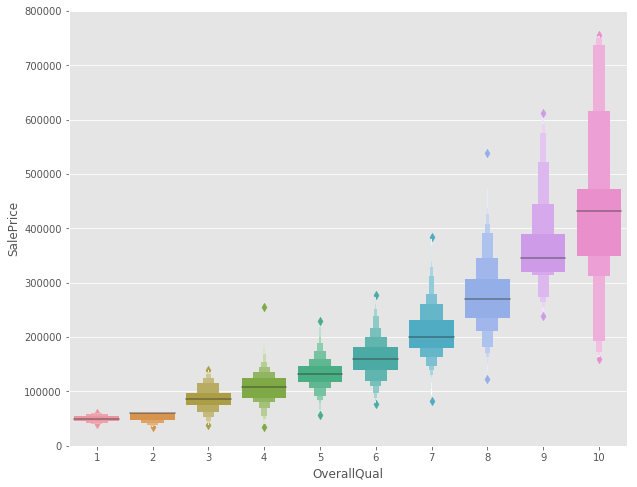

In [5]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxenplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

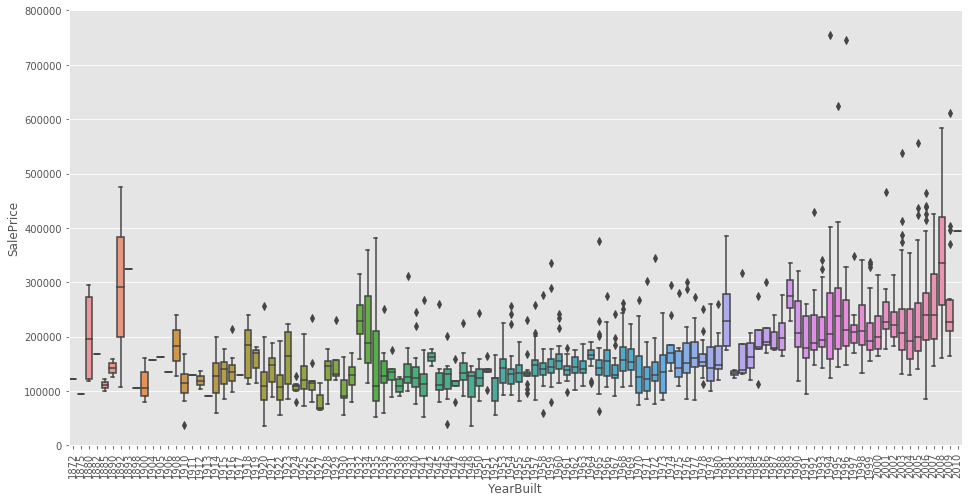

In [6]:
#box plot for sales price 
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data = data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation='90');

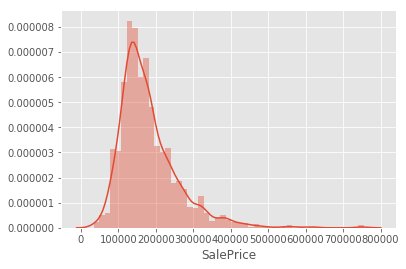

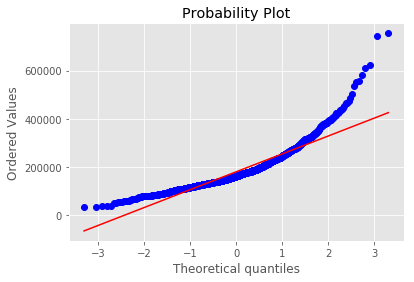

In [7]:
#dependent variable research - SalePrice
#plot shows positive skewness, needs to become more normally distributed

sns.distplot(train['SalePrice'])
saleprice_plot1 = plt.figure()
saleprice_plot2 = scipy.stats.probplot(train['SalePrice'],plot=plt)

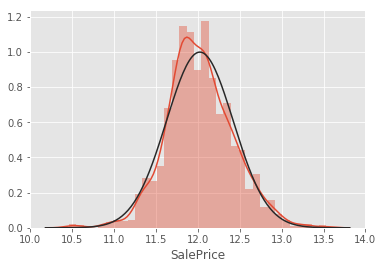

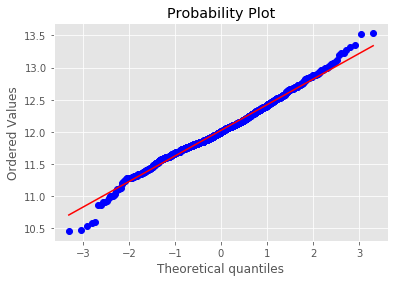

In [8]:
#dependent variable transformation - SalePrice
#eliminates positive skewness, makes normally distributed

train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'], fit=norm)

saleprice_plot1 = plt.figure()
saleprice_plot2 = scipy.stats.probplot(train['SalePrice'],plot=plt)

In [9]:
# Deleting outliers
train = train[train['Id'] != 692][train['Id'] != 1183]

# drop outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<12.5)].index)
train = train.drop(train[(train['LotArea']>150000)].index)
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<12.5)].index)

In [10]:
len_train = train.shape[0]
y = train['SalePrice']
ID = test['Id']
joint_datasets = pd.concat([train, test])
del joint_datasets['Id']

In [11]:
train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
train.select_dtypes(include=["int","float"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
obj_len=len(train.select_dtypes(include=['object']).columns)
num_len=len(train.select_dtypes(include=["int","float"]).columns)
print('Variables with categorical data : {}'.format(obj_len), '\n'
      'Variables with numeric data: {}'.format(num_len), '\n'
     'Total number of variables: {}'.format(obj_len+num_len))

Variables with categorical data : 43 
Variables with numeric data: 38 
Total number of variables: 81


In [14]:
obj=train.select_dtypes(include=['object'])
num=train.select_dtypes(include=['int','float'])

In [15]:
#summarising continuous variables
num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1450.000000,1450.000000,1194.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1450.000000,...,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,730.411724,56.779310,69.560302,10076.798621,6.091034,5.577931,1971.209655,1984.846207,101.869626,435.805517,...,93.457241,46.268966,22.105517,3.433103,15.164828,2.064138,42.575172,6.325517,2007.816552,12.021017
std,421.856681,42.128164,22.904777,6044.406501,1.367569,1.113842,30.229605,20.642621,177.293422,429.323786,...,124.105812,65.425924,61.302376,29.416948,55.935396,35.456707,497.193490,2.701424,1.331055,0.395400
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,366.250000,20.000000,59.000000,7508.750000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774528
50%,731.500000,50.000000,69.000000,9451.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,380.500000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.000898
75%,1094.750000,70.000000,80.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,705.750000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.271385
max,1460.000000,190.000000,313.000000,115149.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.345509


Analysis and Visualizing missing data:


In [16]:
#combine the data sets to and impute missing data. 
#how frequent is data missing? #is there any pattern to missing data?

#joint_datasets= pd.concat([train,test]).reset_index(drop=True)
print('Combined data sets size is: {}'.format(joint_datasets.shape))

missing_data= (joint_datasets.isnull().sum()/len(joint_datasets))*100
missing_data=missing_data.drop(missing_data[missing_data==0].index).sort_values(ascending=False)[:20]
missing_data=missing_data.drop(['SalePrice'])
missing_data= pd.DataFrame({'missing%':missing_data})
missing_data


Combined data sets size is: (2909, 80)


,missing%
PoolQC,99.724991
MiscFeature,96.493640
Alley,93.193537
Fence,80.405638
FireplaceQu,48.779649
LotFrontage,16.603644
GarageQual,5.465796
GarageCond,5.465796
GarageFinish,5.465796
GarageYrBlt,5.465796


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

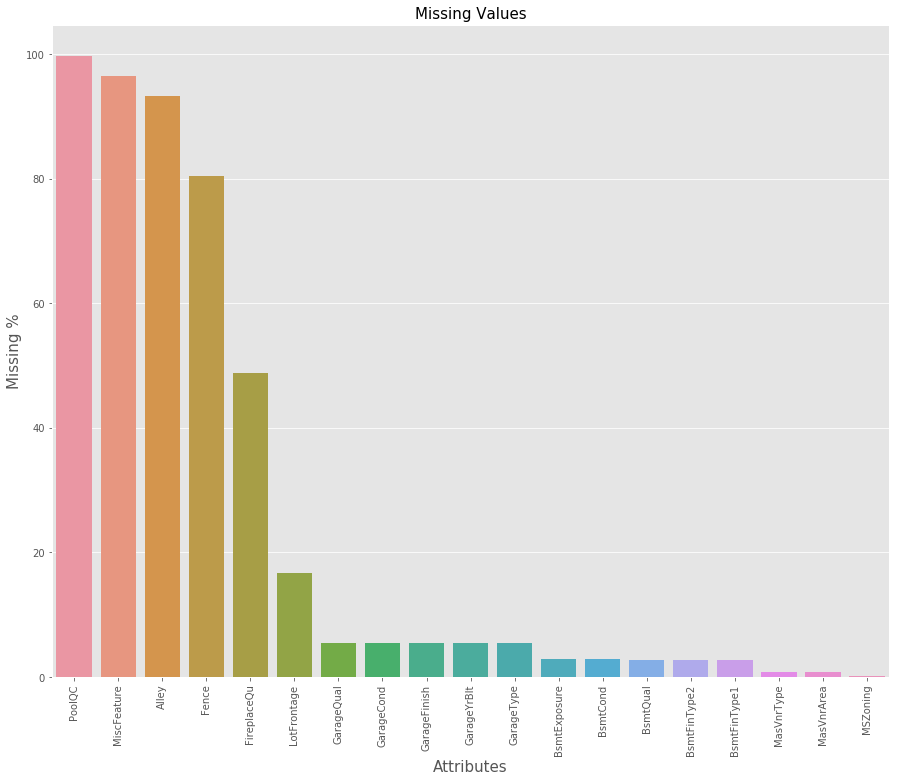

In [17]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=missing_data.index, y=missing_data['missing%'])
plt.title('Missing Values',fontsize=15 )
plt.xlabel('Attributes', fontsize=15)
plt.ylabel('Missing %', fontsize=15)
plt.xticks(rotation='90')

In [18]:
#replacing all missing values in poolQC with NA indicating no pool
joint_datasets["PoolQC"] = joint_datasets["PoolQC"].fillna("NA")

#replacing all missing values in MiscFeatures with NA 
joint_datasets["MiscFeature"] = joint_datasets["MiscFeature"].fillna("NA")

#replacing all missing values in Alley with NA indicating no alley access in house 
joint_datasets["Alley"] = joint_datasets["Alley"].fillna("NA")

#replacing all missing values in Fence with NA indicating no fence present 
joint_datasets["Fence"] = joint_datasets["Fence"].fillna("NA")

#replacing all missing values in FireplaceQU with NA indicating no fireplace
joint_datasets["FireplaceQu"] = joint_datasets["FireplaceQu"].fillna("NA")

#MasVnr is mason vaneer. we can fill NA for the type and 0 for the area
joint_datasets["MasVnrType"] = joint_datasets["MasVnrType"].fillna("NA")
joint_datasets["MasVnrArea"] = joint_datasets["MasVnrArea"].fillna(0)

'''since there are only 4 missing values in MSzoning, we can fill these 4 with the mode, which is RL
ith mode() you use [0] because it is a series with a single row, so when you pass this to fillna it 
only fills the first row, so what you want is to get the scalar value by indexing into the Series'''

joint_datasets['MSZoning'] = joint_datasets['MSZoning'].fillna(joint_datasets['MSZoning'].mode()[0])

"""For utilities(categorical),all records are "AllPub", except for one "NoSeWa" and 2 NA .
Since the house with 'NoSewa' is in the training set,lets remove it."""

#joint_datasets = joint_datasets.drop(['Utilities'], axis=1)
del joint_datasets['Utilities']

#over 1357 data points contain Typ meaning typical, so we fill our NA with typ
joint_datasets["Functional"] = joint_datasets["Functional"].fillna("Typ")

#Electrical has only 1 NA value, so filling it with mode
joint_datasets['Electrical'] = joint_datasets['Electrical'].fillna(joint_datasets['Electrical'].mode()[0])

#Kitchen quality has only 1 NA value so filling it with the mode
joint_datasets['KitchenQual'] = joint_datasets['KitchenQual'].fillna(joint_datasets['KitchenQual'].mode()[0])

#both Ext1 and Ext2 have only 1 missing value, so we fill it with the mode
joint_datasets['Exterior1st'] = joint_datasets['Exterior1st'].fillna(joint_datasets['Exterior1st'].mode()[0])
joint_datasets['Exterior2nd'] = joint_datasets['Exterior2nd'].fillna(joint_datasets['Exterior2nd'].mode()[0])

#1 NA value, so filling it with WD which is the mode
joint_datasets['SaleType'] = joint_datasets['SaleType'].fillna(joint_datasets['SaleType'].mode()[0])

"""LotFrontage has 486 NA values, since buildings in the same neighborhood are more likley to have similar fronatge 
we can group by neighborhood and assign the same fronatge for properties in the same neighborhood"""

joint_datasets["LotFrontage"] = joint_datasets.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#fill NA values in all garage columns which is categorical data with string NA
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    joint_datasets[col] = joint_datasets[col].fillna('NA')

#Fill NA values in continuous data for garage with 0 and NA for basement data implying there isn't a basement
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    joint_datasets[col] = joint_datasets[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    joint_datasets[col] = joint_datasets[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    joint_datasets[col] = joint_datasets[col].fillna('NA')

In [19]:
#lets check if there are any missing values left
joint_datasets.isna().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
Alley               0
BedroomAbvGr        0
BldgType            0
BsmtCond            0
BsmtExposure        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFinType1        0
BsmtFinType2        0
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual            0
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
ExterCond           0
ExterQual           0
Exterior1st         0
Exterior2nd         0
Fence               0
FireplaceQu         0
Fireplaces          0
Foundation          0
FullBath            0
                 ... 
LotFrontage         0
LotShape            0
LowQualFinSF        0
MSSubClass          0
MSZoning            0
MasVnrArea          0
MasVnrType          0
MiscFeature         0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PavedDrive

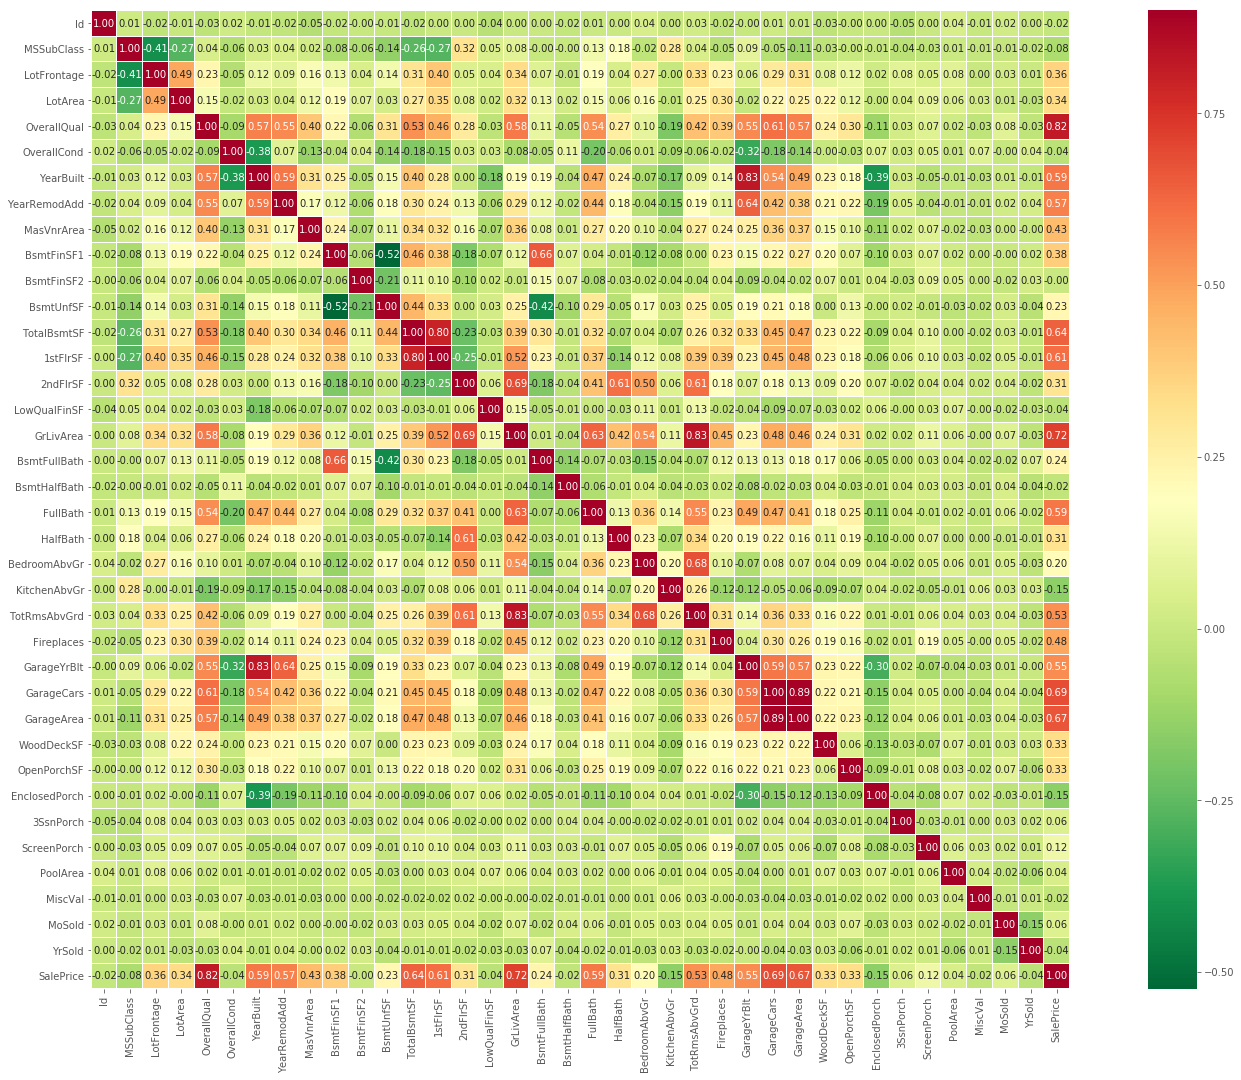

In [20]:
#lets do a correlation matrix for the numerical variables
from matplotlib.pyplot import figure
matrix=train.corr()
fig = plt.figure(figsize=(28,18))
sns.heatmap(matrix,vmax=.9,square=True, cmap='RdYlGn_r',fmt='.2f',annot=True, linewidths=.05)

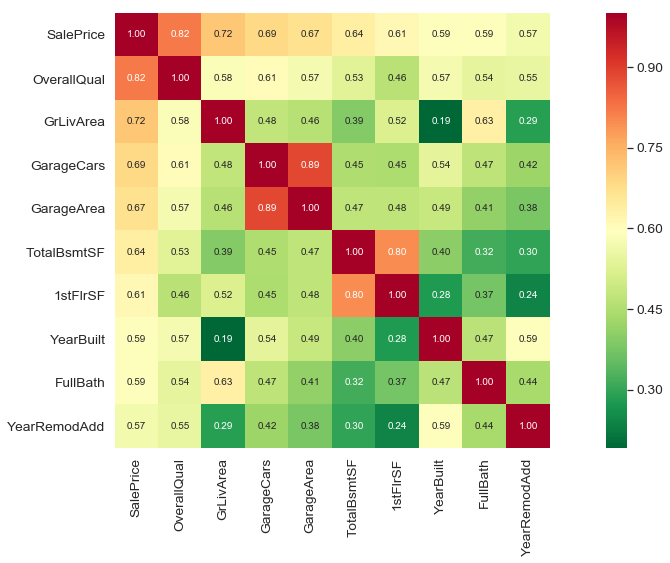

In [21]:
#lets look at the 10 most significant variables that are most correlated to saleprice
k=10
matrix10=matrix.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[matrix10].values.T)
sns.set(font_scale=1.25)
fig = plt.figure(figsize=(20,8))
heatmap10= sns.heatmap(cm,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},cmap='RdYlGn_r',yticklabels=matrix10.values, xticklabels=matrix10.values)


In [22]:
most_corr= pd.DataFrame(matrix10)
most_corr.columns=['Highest Correlating Features']
most_corr

,Highest Correlating Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,YearBuilt
8,FullBath
9,YearRemodAdd


Taking a look at how each one is co-related to sale price

In [23]:
#sale price against overallquality
#data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
#f, ax = plt.subplots(figsize=(10, 8))
#fig = sns.boxenplot(x='OverallQual', y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);

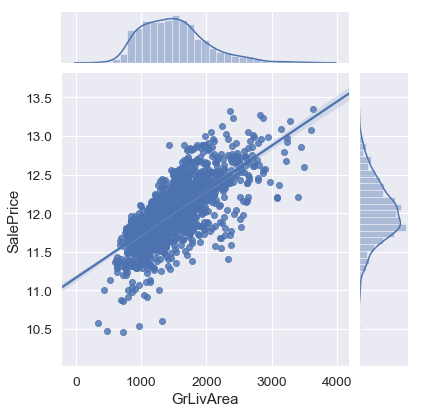

In [24]:
#sale price against above groung living area sqft (GrLivArea)
sns.jointplot(x=train['GrLivArea'], y=train['SalePrice'],kind='reg')

In [25]:
#train = train.drop(train[(train['SalePrice']<300000) & (train['GrLivArea']>4000)].index)
#joint_datasets = joint_datasets.drop(joint_datasets[(joint_datasets['SalePrice']<300000) & (joint_datasets['GrLivArea']>4000)].index)

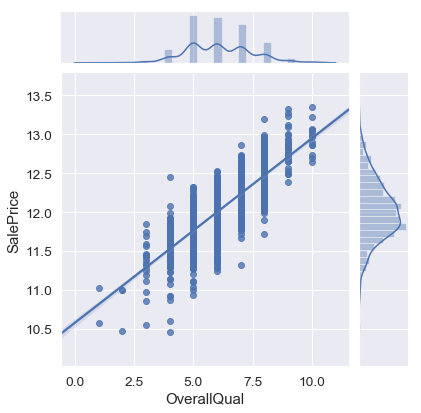

In [26]:
sns.jointplot(x=train['OverallQual'], y=train['SalePrice'], kind='reg')

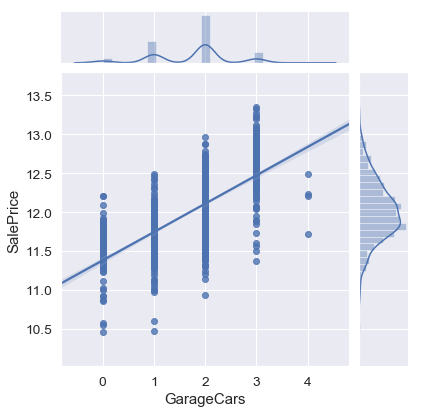

In [27]:
sns.jointplot(x=train['GarageCars'], y=train['SalePrice'], kind = 'reg')

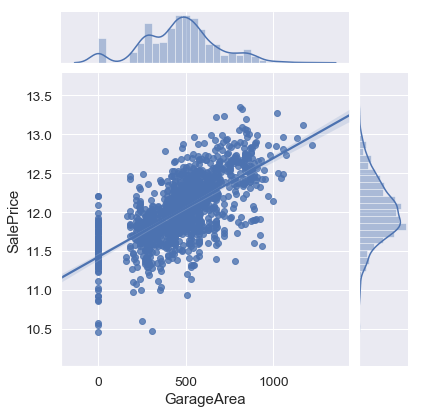

In [28]:
sns.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind = 'reg')

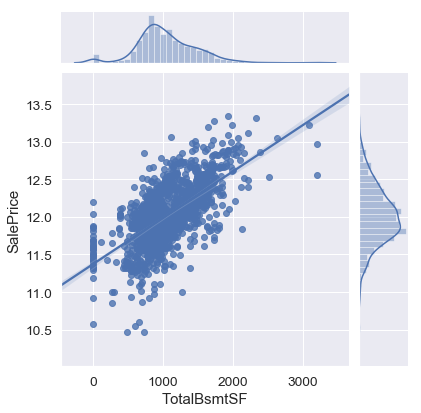

In [29]:
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePrice'], kind = 'reg')

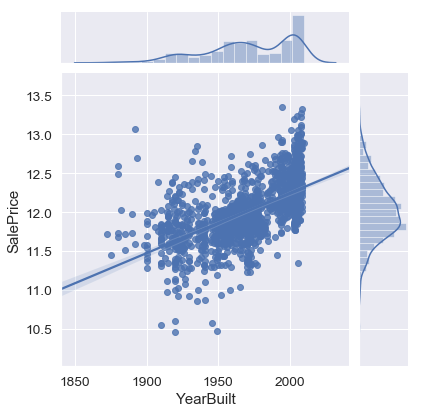

In [30]:
#sale price against year built (YearBuilt)
sns.jointplot(x=train['YearBuilt'], y=train['SalePrice'], kind = 'reg')

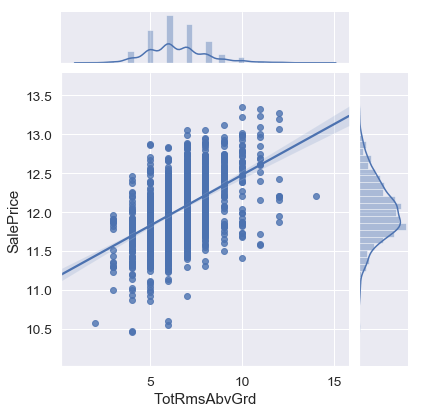

In [31]:
#sale price against total rooms above ground (TotRmsAbvGrd)
sns.jointplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'], kind = 'reg')

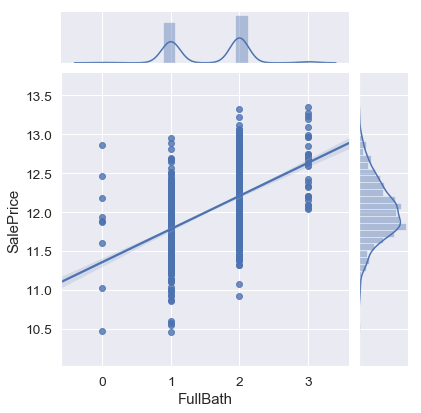

In [32]:
#sale price against how many full baths are in the house (FullBath)
sns.jointplot(x=train['FullBath'], y=train['SalePrice'], kind = 'reg')

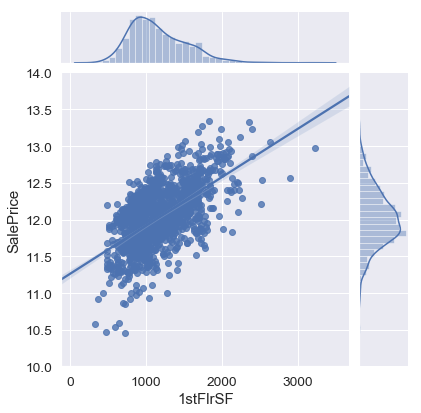

In [33]:
#sale price against total first floor square footage (1stFlrSF)
sns.jointplot(x=train['1stFlrSF'], y=train['SalePrice'], kind = 'reg')

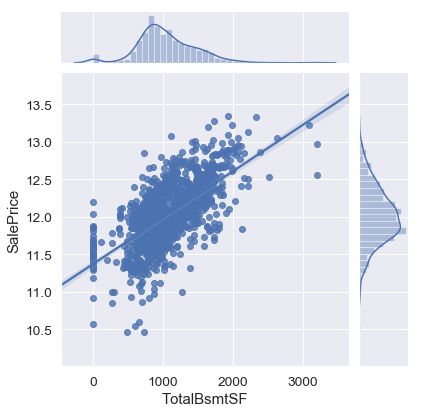

In [34]:
#sale price against total basement square footage (TotalBsmtSF)
sns.jointplot(x=train['TotalBsmtSF'], y=train['SalePrice'], kind = 'reg')

In [35]:
# making catergorical data in str in jointdata sets 
joint_datasets['MoSold'] = joint_datasets['MoSold'].astype(str)

joint_datasets['MSSubClass'] = joint_datasets['MSSubClass'].apply(str)

joint_datasets['OverallCond'] = joint_datasets['OverallCond'].astype(str)

joint_datasets['YrSold'] = joint_datasets['YrSold'].astype(str)

In [36]:
# Finding the Kurtosis of SalePrice
print("Kurtosis: %f" % train['SalePrice'].kurt())

Kurtosis: 0.684559


In [37]:
#box plot for sales price 
#data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
#f, ax = plt.subplots(figsize=(16, 8))
#fig = sns.boxplot(x="YearBuilt", y="SalePrice", data = data)
#fig.axis(ymin=0, ymax=800000);
#plt.xticks(rotation='90');

In [38]:
#Convert appropriate ordianal columns to int rank¶

#train_encoded = train.copy()

# Lot shape as int
encode_LotShape = {"IR3": 1, "IR2": 2, "IR1": 3, "Reg" : 4}
joint_datasets['LotShape'] = joint_datasets.LotShape.replace(encode_LotShape)

# Land Slope as int
encode_LandSlope = {"Sev": 1, "Mod": 2, "Gtl" : 3}
joint_datasets['LandSlope'] = joint_datasets.LandSlope.replace(encode_LandSlope)

# External quality as int
encode_ExterQual = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['ExterQual'] = joint_datasets.ExterQual.replace(encode_ExterQual)

# External condition seems like a nonlinear indicator with a huge range of values at 5! CONSIDER DROPPING IT
encode_ExterCond = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['ExterCond'] = joint_datasets.ExterCond.replace(encode_ExterCond)

# Basement quality
encode_BsmtQual = {"nan": 0, "Po": 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['BsmtQual'] = joint_datasets.BsmtQual.replace(encode_BsmtQual)

# Basement condition seems like a nonlinear indicator with a huge range of values at 5! CONSIDER ONE HOT
encode_BsmtCond = {"nan": 0, "Po": 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['BsmtCond'] = joint_datasets.BsmtCond.replace(encode_BsmtCond)

# Basement exposure
encode_BsmtExposure = {"nan" : 0, "No": 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
joint_datasets['BsmtExposure'] = joint_datasets.BsmtExposure.replace(encode_BsmtExposure)

# Heating QC as int
encode_HeatingQC = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['HeatingQC'] = joint_datasets.HeatingQC.replace(encode_HeatingQC)

# Kitchen quality as int
encode_KitchenQual = {"Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['KitchenQual'] = joint_datasets.KitchenQual.replace(encode_KitchenQual)

# Fireplace quality isn't well represented as linear. CONSIDER ONE HOT
encode_FireplaceQu = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['FireplaceQu'] = joint_datasets.FireplaceQu.replace(encode_FireplaceQu)

# Functional as int
encode_Functional = {"Sal": 0, "Sev" : 1, "Maj2": 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7}
joint_datasets['Functional'] = joint_datasets.Functional.replace(encode_Functional)

# GarageQual as int
encode_GarageQual = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['GarageQual'] = joint_datasets.GarageQual.replace(encode_GarageQual)

# GarageCond as int
encode_GarageCond = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['GarageCond'] = joint_datasets.GarageCond.replace(encode_GarageCond)

# PoolQC as int
encode_PoolQC = {"nan": 0, "Po" : 1, "Fa": 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
joint_datasets['PoolQC'] = joint_datasets.PoolQC.replace(encode_PoolQC)

# BsmtFinType1 as int
encode_BsmtFinType1 = {"NA": 0, "Unf": 1, "LwQ": 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, "GLQ": 6}
joint_datasets['BsmtFinType1'] = joint_datasets.BsmtFinType1.replace(encode_BsmtFinType1)

# BsmtFinType2 as int
encode_BsmtFinType2 = {"NA": 0, "Unf": 1, "LwQ": 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, "GLQ": 6}
joint_datasets['BsmtFinType2'] = joint_datasets.BsmtFinType2.replace(encode_BsmtFinType2)

# GarageFinish as int
encode_GarageFinish = {"NA": 0, "Unf" : 1, "RFn": 2, 'Fin': 3}
joint_datasets['GarageFinish'] = joint_datasets.GarageFinish.replace(encode_GarageFinish)

# PavedDrive as int
encode_PavedDrive = {"N": 0, "P" : 1, "Y": 2}
joint_datasets['PavedDrive'] = joint_datasets.PavedDrive.replace(encode_PavedDrive)

In [39]:
#Replace NaN in float columns to 0 and convert all float to int¶

for col in joint_datasets.columns:
    if joint_datasets[col].dtype == 'float64':
        joint_datasets[col] = joint_datasets[col].apply(lambda x: 0 if pd.isnull(x) else x)
        joint_datasets[col] = joint_datasets[col].apply(int)

In [40]:
#Convert MoSold feature
preserved_mapper_MoSold = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
joint_datasets['MoSold'] = joint_datasets.MoSold.replace(preserved_mapper_MoSold)

In [41]:
#Use get_dummies to encode remaining string features¶
joint_datasets = pd.get_dummies(joint_datasets)

In [42]:
# finding the skewness for all the columns to start the transformations 
obj_skew=joint_datasets.select_dtypes(include=["float", "int"]).columns
# train[obj_skew].head()
skew_ = joint_datasets[obj_skew].dropna()
skew_list = [scipy.stats.skew(skew_[x]) for x in skew_.columns]
skew_house = pd.DataFrame({'Col':skew_.columns, 'Skew': skew_list})
skew_house

,Col,Skew
0,1stFlrSF,1.258812
1,2ndFlrSF,0.841537
2,3SsnPorch,11.356127
3,BedroomAbvGr,0.328847
4,BsmtFinSF1,0.977919
5,BsmtFinSF2,4.155970
6,BsmtFinType1,-0.147501
7,BsmtFinType2,3.159035
8,BsmtFullBath,0.615244
9,BsmtHalfBath,3.952687


In [43]:
#boxcox transformation on remaining skewed variables

#narrows skew_house to only skew over .75
skew_house = skew_house[abs(skew_house['Skew']) > 0.75]
#print(skew_house)

skewed_items = skew_house['Col']

#boxcox with lambda of .15
for Col in skewed_items:
    joint_datasets[Col] = scipy.special.boxcox1p(joint_datasets[Col],.15)

# not sure on the skew threshold or lambda there, open to changing

In [44]:
#creating y for sklearn:
y = train.SalePrice

In [45]:
#from sklearn.model_selection import KFold, cross_val_score, train_test_split

#K-folds Validation function
#n_folds = 5 # if LOOCV k = df_train.shape[0]

#def rmsle_cv(model,df):
#    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
#    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
#    return(rmse)

Text(0.5,1,'Search for the Best Alpha')

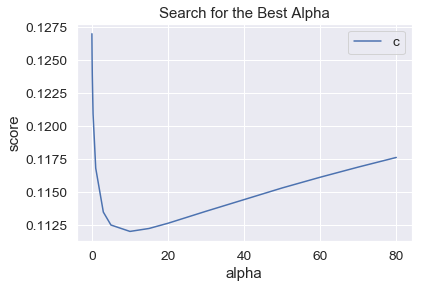

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV

encoded_train = joint_datasets[:len_train]
encoded_test = joint_datasets[len_train:]
#del joint_datasets
del encoded_train['SalePrice']

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, encoded_train, y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(encoded_train, y)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)
    
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Search for the Best Alpha')
#plt.savefig('ridge.png')

In [47]:
alphas_alt = [9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1,10.2]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(encoded_train, y)

print("Ridge rmse : ",cv_rmse(ridge_model2).mean())

Ridge rmse :  0.11204924454595737


In [48]:
ridge_coeffs = pd.DataFrame(list(zip(
    encoded_train.columns, ridge_model2.steps[1][1].coef_)), columns=['Predictors', 'Coefficients'])

In [49]:
print("Best of alpha in ridge model :" ,ridge_model2.steps[1][1].alpha_)


Best of alpha in ridge model : 9.4


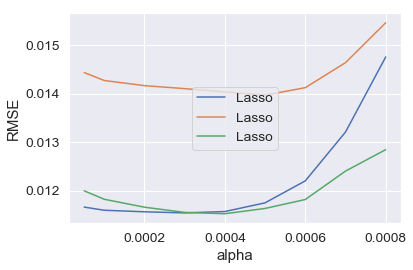

<Figure size 432x288 with 0 Axes>

In [53]:
from sklearn.linear_model import LassoCV

alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas2,)).fit(encoded_train, y)
scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()
plt.savefig('lasso.png')

Lasso picked 118 variables and eliminated the other 178 variables


Text(0.5,1,'Coefficients in the Lasso Model')

<Figure size 432x288 with 0 Axes>

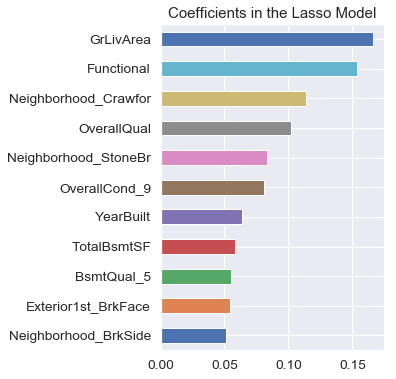

In [54]:
coef = pd.Series(lasso_model2.steps[1][1].coef_, index = encoded_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
plt.figure()
#plt.rcParams['figure.figsize'] = (15.0, 3.0)
figure(figsize=(4,6))

imp_coef = pd.concat([coef[coef > 0.05].sort_values()])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [ ]:
print("Best of alpha in lasso model :",lasso_model2.steps[1][1].alpha_)
print("lasso rmse : ",cv_rmse(lasso_model2).mean())

In [ ]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(encoded_train, y)
print("elastic model rmse : ",cv_rmse(elastic_model3).mean())

In [ ]:
coef = pd.Series(elastic_cv.steps[1][1].coef_, index = encoded_train.columns)
print("Elastic picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
plt.figure()
#plt.rcParams['figure.figsize'] = (15.0, 3.0)
figure(figsize=(4,6))

imp_coef = pd.concat([coef[coef < -0.025].sort_values()])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the ElasticNetCV Model")

In [ ]:
#decision tree 
#must do conda install graphviz
from sklearn import tree
import graphviz 
rantree = tree.DecisionTreeClassifier()
rantree = rantree.fit(joint_datasets, joint_datasets.SalePrice)
tree_data = tree.export_graphviz(rantree, out_file = None, filled = True, special_characters = True, rounded = True) 
graph = graphviz.Source(tree_data) 
graph

In [ ]:
#using all observations and all features 
rantree.fit(joint_datasets, joint_datasets.SalePrice)

In [ ]:
#import gradientboosting regressor and xgboost
#must go to terminal and install pip install xgboost
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

In [ ]:
GradientBoost = GradientBoostingRegressor(loss="huber",
                                         n_estimators=1000, max_depth=5, max_features="sqrt",
                                         min_samples_leaf=5, min_samples_split=10,
                                         random_state=5)

GBRscore = cv_rmse(GradientBoost)
print('Gradient Boosting Regressor score: {:.4f} \n'.format(GBRscore.mean()))

In [ ]:
#loss is least squares regression
#n estimators is number of boosting stages to perform. default is 100, upped to 5000 because higher n usually means better fit
#max_depth limits the number of nodes in the tree
#min_samples_leaf is minimum number of samples at a leaf node
#min_samples_split is threshold for stopping tree growth
#may need to add in max_features to tune model bias and variance

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [ ]:
XGBRegress = xgboost.XGBRegressor(max_depth=4,
                                 learning_rate=0.05, n_estimators=1000,
                                 silent=1, n_jobs=1,
                                 gamma=.05, min_child_weight=1.8, max_delta_step=0,
                                 subsample=.5, colsample_bytree=.5, colsample_bylevel=1,
                                 reg_alpha=.5, reg_lambda=.9, scale_pos_weight=1, base_score=0.5,
                                 random_state=10, seed=None, missing=None, importance_type="gain")

XGBscore = cv_rmse(XGBRegress)
print("XGB Regressor score: {:.4f}\n" .format(XGBscore.mean()))

In [ ]:
#kept n_estimators same as GradientBoost
#kept max_depth same as GradientBoost
#kept rest of items as defaults for now...

#https://xgboost.readthedocs.io/en/latest/python/python_api.html